<a href="https://colab.research.google.com/github/NaveenKumarPN07/ML_LAB/blob/main/1BM23CS205_LAB3_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

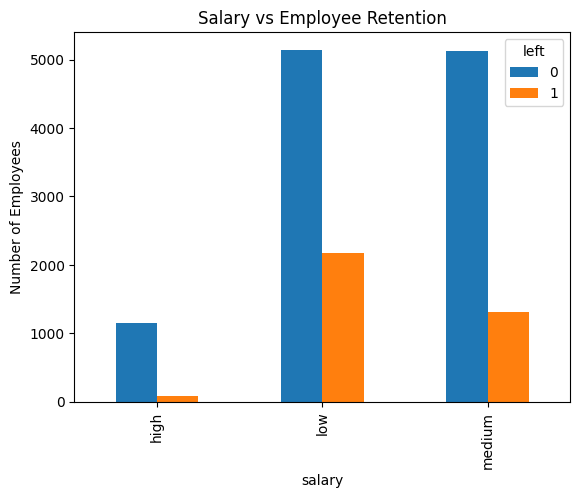

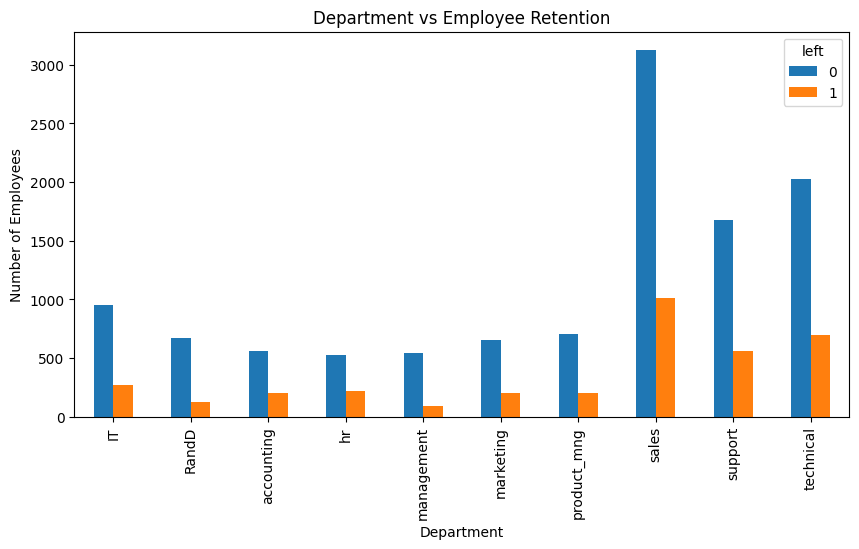

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

print(df.head())
print(df.info())
print(df.describe())

# Retention vs Salary
pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.ylabel("Number of Employees")
plt.show()

# Retention vs Department
pd.crosstab(df['Department'], df['left']).plot(kind='bar', figsize=(10,5))
plt.title("Department vs Employee Retention")
plt.ylabel("Number of Employees")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select useful features
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

X = df[['satisfaction_level',
        'average_montly_hours',
        'promotion_last_5years',
        'salary']]

y = df['left']   # 1 = left, 0 = stayed

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.7686666666666667


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("zoo-data.csv")

# Drop animal name column (not useful)
df = df.drop('animal_name', axis=1)

# Features and target
X = df.drop('class_type', axis=1)
y = df['class_type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Multiclass Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9523809523809523
Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
